In [1]:
%matplotlib inline

import ultralytics
ultralytics.checks()
from ultralytics import YOLO
model = YOLO("yolo11n.pt")

import torch
import torch.version
import torchvision
print("Torch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print(torch.version.cuda)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)

#from PIL import Image
#import depth_pro

# Load model and preprocessing transform
#depth_model, transform = depth_pro.create_model_and_transforms(device="cuda",precision=torch.float16)
#depth_model.eval()

#from sklearn.cluster import DBSCAN
#import matplotlib.pyplot as plt

import cv2
from ultralytics import solutions

Ultralytics 8.3.90 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA RTX 2000 Ada Generation Laptop GPU, 8188MiB)
Setup complete ✅ (28 CPUs, 15.5 GB RAM, 75.5/1006.9 GB disk)
Torch version: 2.6.0+cu124
Torchvision version: 0.21.0+cu124
12.4
CUDA available: True
CUDA version: 12.4


In [16]:
results = model.track(source="videos/Pedestrians_1.mp4",stream=True,classes=[0],save=True)
for r in results:
    print(r.orig_shape)


video 1/1 (frame 1/740) /home/nas/SUSTAI_X_SUBSEQUENTAI_Group_project/videos/Pedestrians_1.mp4: 384x640 8 persons, 29.0ms
(480, 848)
video 1/1 (frame 2/740) /home/nas/SUSTAI_X_SUBSEQUENTAI_Group_project/videos/Pedestrians_1.mp4: 384x640 4 persons, 15.0ms
(480, 848)
video 1/1 (frame 3/740) /home/nas/SUSTAI_X_SUBSEQUENTAI_Group_project/videos/Pedestrians_1.mp4: 384x640 5 persons, 16.1ms
(480, 848)
video 1/1 (frame 4/740) /home/nas/SUSTAI_X_SUBSEQUENTAI_Group_project/videos/Pedestrians_1.mp4: 384x640 5 persons, 15.0ms
(480, 848)
video 1/1 (frame 5/740) /home/nas/SUSTAI_X_SUBSEQUENTAI_Group_project/videos/Pedestrians_1.mp4: 384x640 5 persons, 15.2ms
(480, 848)
video 1/1 (frame 6/740) /home/nas/SUSTAI_X_SUBSEQUENTAI_Group_project/videos/Pedestrians_1.mp4: 384x640 5 persons, 15.3ms
(480, 848)
video 1/1 (frame 7/740) /home/nas/SUSTAI_X_SUBSEQUENTAI_Group_project/videos/Pedestrians_1.mp4: 384x640 4 persons, 15.3ms
(480, 848)
video 1/1 (frame 8/740) /home/nas/SUSTAI_X_SUBSEQUENTAI_Group_projec

In [3]:
#works but speeds dont change and aren't necesarily good 
cap = cv2.VideoCapture("videos/VID-20250322-WA0007.mp4")
assert cap.isOpened(), "Error reading video file"

# Video writer
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))
video_writer = cv2.VideoWriter("Speed_Results/VID-20250322-WA0007.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# speed region points
speed_region = [(1, 1), (w, 0), (w, h), (0, h)]

# Initialize speed estimation object
speedestimator = solutions.SpeedEstimator(
    show=False,  # display the output
    model="yolo11n.pt",  # path to the YOLO11 model file.
    region=speed_region,  # pass region points
    classes=[0],  # estimate speed of specific classes.
    # line_width=2,  # adjust the line width for bounding boxes
)

# Process video
while cap.isOpened():
    success, im0 = cap.read()

    if not success:
        print("Video frame is empty or processing is complete.")
        break

    results = speedestimator(im0)

    # print(results)  # access the output

    video_writer.write(results.plot_im)  # write the processed frame.

cap.release()
video_writer.release()
cv2.destroyAllWindows()  # destroy all opened windows

Ultralytics Solutions: ✅ {'region': [(1, 1), (1280, 0), (1280, 720), (0, 720)], 'show_in': True, 'show_out': True, 'colormap': None, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'json_file': None, 'records': 5, 'show': False, 'model': 'yolo11n.pt', 'classes': [0]}

0: 384x640 4 persons, 16.5ms
Speed: 2.9ms preprocess, 16.5ms inference, 47.9ms postprocess per image at shape (1, 3, 384, 640)
🚀 Results: SolutionResults(total_tracks=4)

0: 384x640 4 persons, 17.6ms
Speed: 2.1ms preprocess, 17.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)
🚀 Results: SolutionResults(total_tracks=4)

0: 384x640 4 persons, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)
🚀 Results: SolutionResults(total_tracks=4)

0: 384x640 4 persons, 14.9ms
Speed: 2.3ms preprocess, 14.9ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)
🚀 Results: SolutionResults(total_tracks=4)

0: 384x640 4 pe

In [ ]:
#change the speedz -- works as before, so speeds dont change

from collections import defaultdict

cap = cv2.VideoCapture("videos/VID-20250322-WA0007.mp4")
assert cap.isOpened(), "Error reading video file"

# Video writer setup
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))
video_writer = cv2.VideoWriter("Speed_Results/VID-20250322-WA0007.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

speed_obj = solutions.SpeedEstimator(
    region=[(1, 1), (w, 0), (w, h), (0, h)],
    names=model.names,
    show=False,
    classes=[0]
)

object_speeds = defaultdict(list)  # Store speed estimates for each object
frame_counter = 0  # Frame counter to track every 50 frames

# Loop to handle continuous video processing
while cap.isOpened():
    success, img = cap.read()
    if not success:
        break  # If the video ends, break out of the loop

    tracks = model.track(img, persist=True, show=False, tracker="bytetrack.yaml")

    if tracks is not None:
        updated_tracks = []

        if frame_counter % 50 == 0:  # Update speed every 50th frame
            for track in tracks:
                obj_id = track.id if hasattr(track, 'id') else None
                if obj_id is not None:
                    if hasattr(track, 'speed'):
                        # Store or update the speed for this object every 50 frames
                        object_speeds[obj_id] = [track.speed]  # Update the speed for this object

        # Apply the speed information for the next frames (before the next update)
        for track in tracks:
            obj_id = track.id if hasattr(track, 'id') else None
            if obj_id is not None and obj_id in object_speeds:
                # Use the most recent speed for this object
                track.speed = object_speeds[obj_id][0]  # Update track with the latest speed

            updated_tracks.append(track)

            # Display the speed on the frame (even for frames between updates)
            if obj_id is not None and obj_id in object_speeds:
                speed_text = f"Speed: {object_speeds[obj_id][0]:.2f} m/s"
                # Draw the speed text on the image (you can adjust the position)
                cv2.putText(img, speed_text, (int(track.x), int(track.y) - 10), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA)

        # Process the image with the updated speed information
        img = speed_obj(img)

    # Increment the frame counter
    frame_counter += 1

    # Write the processed frame to the video output
    video_writer.write(img.plot_im)

cap.release()
video_writer.release()
cv2.destroyAllWindows()


Ultralytics Solutions: ✅ {'region': [(1, 1), (1280, 0), (1280, 720), (0, 720)], 'show_in': True, 'show_out': True, 'colormap': None, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'json_file': None, 'records': 5, 'show': False, 'model': 'yolo11n.pt', 'classes': [0], 'names': {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 4

In [ ]:
# 50 frames at a time only
cap = cv2.VideoCapture("videos/VID-20250322-WA0007.mp4")
assert cap.isOpened(), "Error reading video file"

# Video writer
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))
video_writer = cv2.VideoWriter("Speed_Results/VID-20250322-WA0007_16.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# speed region points
speed_region = [(1, 1), (w, 0), (w, h), (0, h)]

# Initialize speed estimation object
speedestimator = solutions.SpeedEstimator(
    show=False,  # display the output
    model="yolo11n.pt",  # path to the YOLO11 model file.
    region=speed_region,  # pass region points
    # classes=[0, 2],  # estimate speed of specific classes.
    # line_width=2,  # adjust the line width for bounding boxes
)



# Process video for first 50 frames
frame_count = 0


while cap.isOpened() and frame_count < 800:
    success, im0 = cap.read()

    if not success:
        print("Video frame is empty or processing is complete.")
        break

    if frame_count >= 750:  # Start processing from the 51st frame
        results = speedestimator(im0)

        # print(results)  # access the output

        video_writer.write(results.plot_im)  # write the processed frame.

    frame_count += 1  # Increment the frame counter

cap.release()
video_writer.release()
cv2.destroyAllWindows()  # destroy all opened windows




Ultralytics Solutions: ✅ {'region': [(1, 1), (1280, 0), (1280, 720), (0, 720)], 'show_in': True, 'show_out': True, 'colormap': None, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'json_file': None, 'records': 5, 'show': False, 'model': 'yolo11n.pt', 'classes': [0], 'names': {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 4

AttributeError: 'SpeedEstimator' object has no attribute 'plot_results'

In [91]:
# List of video files to concatenate
video_files = [
    "Speed_Results/VID-20250322-WA0007_1.avi",
    "Speed_Results/VID-20250322-WA0007_2.avi",
    "Speed_Results/VID-20250322-WA0007_3.avi",
    "Speed_Results/VID-20250322-WA0007_4.avi",
    "Speed_Results/VID-20250322-WA0007_5.avi",
    "Speed_Results/VID-20250322-WA0007_6.avi",
    "Speed_Results/VID-20250322-WA0007_7.avi",
    "Speed_Results/VID-20250322-WA0007_8.avi",
    "Speed_Results/VID-20250322-WA0007_9.avi",
    "Speed_Results/VID-20250322-WA0007_10.avi",
    "Speed_Results/VID-20250322-WA0007_11.avi",
    "Speed_Results/VID-20250322-WA0007_12.avi",
    "Speed_Results/VID-20250322-WA0007_13.avi",
    "Speed_Results/VID-20250322-WA0007_14.avi",
    "Speed_Results/VID-20250322-WA0007_15.avi",
    "Speed_Results/VID-20250322-WA0007_16.avi"
]

# Open the first video to get video properties
cap = cv2.VideoCapture(video_files[0])
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
cap.release()

# Create a VideoWriter object for the output video
output_video = "Speed_Results/VID-20250322-WA0007_full.avi"
video_writer = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*"mp4v"), fps, (frame_width, frame_height))

# Loop through each video file and concatenate
for video_file in video_files:
    cap = cv2.VideoCapture(video_file)
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        video_writer.write(frame)  # Write each frame to the output video
    
    cap.release()

video_writer.release()
print(f"Concatenation complete. Output saved as {output_video}")

Concatenation complete. Output saved as Speed_Results/VID-20250322-WA0007_full.avi


In [ ]:
#object counter
cap = cv2.VideoCapture("videos/VID-20250322-WA0007.mp4")
assert cap.isOpened(), "Error reading video file"

region_points =[(1, 1), (w, 0), (w, h), (0, h)]
# region_points = [(20, 400), (1080, 400)]                                      # line counting
#region_points = [(20, 400), (1080, 400), (1080, 360), (20, 360)]  # rectangle region
# region_points = [(20, 400), (1080, 400), (1080, 360), (20, 360), (20, 400)]   # polygon region

# Video writer
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))
video_writer = cv2.VideoWriter("Speed_Results/VID-20250322-WA0007.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Initialize object counter object
counter = solutions.ObjectCounter(
    show=False,  # display the output
    region=region_points,  # pass region points
    model="yolo11n.pt",  # model="yolo11n-obb.pt" for object counting with OBB model.
    # classes=[0, 2],  # count specific classes i.e. person and car with COCO pretrained model.
    # tracker="botsort.yaml",  # choose trackers i.e "bytetrack.yaml"
)

# Process video
while cap.isOpened():
    success, im0 = cap.read()

    if not success:
        print("Video frame is empty or processing is complete.")
        break

    results = counter(im0)

    # print(results)  # access the output

    video_writer.write(results.plot_im)  # write the processed frame.

cap.release()
video_writer.release()
cv2.destroyAllWindows()  # destroy all opened windows

Ultralytics Solutions: ✅ {'region': [(1, 1), (1280, 0), (1280, 720), (0, 720)], 'show_in': True, 'show_out': True, 'colormap': None, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'json_file': None, 'records': 5, 'show': False, 'model': 'yolo11n.pt', 'classes': [0], 'names': {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 4

In [ ]:
#region_points = [(20, 400), (1080, 400), (1080, 360), (20, 360)]  # rectangle region
# region_points = [(20, 400), (1080, 400), (1080, 360), (20, 360), (20, 400)]   # polygon region

# Video writer
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))
video_writer = cv2.VideoWriter("Speed_Results/VID-20250322-WA0007.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Initialize object counter object
counter = solutions.ObjectCounter(
    show=False,  # display the output
    region=region_points,  # pass region points
    model="yolo11n.pt",  # model="yolo11n-obb.pt" for object counting with OBB model.
    # classes=[0, 2],  # count specific classes i.e. person and car with COCO pretrained model.
    # tracker="botsort.yaml",  # choose trackers i.e "bytetrack.yaml"
)

# Process video
while cap.isOpened():
    success, im0 = cap.read()

    if not success:
        print("Video frame is empty or processing is complete.")
        break

    results = counter(im0)

    # print(results)  # access the output

    video_writer.write(results.plot_im)  # write the processed frame.

cap.release()
video_writer.release()
cv2.destroyAllWindows()  # destroy all opened windows

In [ ]:
#instance segmentation and tracking
cap = cv2.VideoCapture("videos/VID-20250322-WA0007.mp4")
assert cap.isOpened(), "Error reading video file"

# Video writer
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))
video_writer = cv2.VideoWriter("Speed_Results/VID-20250322-WA0007.mp4", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Initialize instance segmentation object
isegment = solutions.InstanceSegmentation(
    show=False,  # display the output
    model="yolo11n-seg.pt",  # model="yolo11n-seg.pt" for object segmentation using YOLO11.
    # classes=[0, 2],  # segment specific classes i.e, person and car with pretrained model.
)

# Process video
while cap.isOpened():
    success, im0 = cap.read()

    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break

    results = isegment(im0)

    # print(results)  # access the output

    video_writer.write(results.plot_im)  # write the processed frame.

cap.release()
video_writer.release()
cv2.destroyAllWindows()  # destroy all opened windows

model = YOLO("yolo11n.pt")

results = model.track(source="Speed_Results/VID-20250322-WA0007.mp4",stream=True,classes=[0],save=True)
for r in results:
    print(r.orig_shape)

Ultralytics Solutions: ✅ {'region': [(1, 1), (1280, 0), (1280, 720), (0, 720)], 'show_in': True, 'show_out': True, 'colormap': None, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'json_file': None, 'records': 5, 'show': False, 'model': 'yolo11n-seg.pt', 'classes': [0], 'names': {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana

In [15]:
results = model.track(source="videos/VID-20250322-WA0007.mp4",stream=True,classes=[0])
for r in results:
    #print(r.cuda())
    # Load and preprocess an image.
    #d_image, _, f_px = depth_pro.load_rgb("Homebrew-image/WIN_20250308_20_09_29_Pro.jpg")
    d_img = transform(r.orig_img).to("cuda")
    # Run inference.
    prediction = depth_model.infer(d_img)
    depth = prediction["depth"]  # Depth in [m].
    #focallength_px = prediction["focallength_px"]  # Focal length in pixels.

    print(depth.shape)


video 1/1 (frame 1/765) /home/nas/SUSTAI_X_SUBSEQUENTAI_Group_project/videos/VID-20250322-WA0007.mp4: 384x640 2 persons, 28.3ms


NameError: name 'transform' is not defined

In [7]:
# Load and preprocess an image.
image, _, f_px = depth_pro.load_rgb("Homebrew-image/WIN_20250308_20_09_29_Pro.jpg")
image = transform(image)

In [8]:
# Run inference.
prediction = depth_model.infer(image, f_px=f_px)
depth = prediction["depth"]  # Depth in [m].
focallength_px = prediction["focallength_px"]  # Focal length in pixels.

tensor([[2.1682, 2.4992, 2.6393,  ..., 2.5769, 2.5132, 2.4165],
        [2.6353, 2.6292, 2.6258,  ..., 2.5855, 2.5837, 2.6001],
        [2.6250, 2.6282, 2.6319,  ..., 2.5830, 2.5864, 2.5897],
        ...,
        [6.5091, 6.4676, 6.2196,  ..., 0.4581, 0.4580, 0.4570],
        [7.0227, 6.8405, 6.4666,  ..., 0.4589, 0.4592, 0.4594],
        [5.9889, 7.1293, 6.9391,  ..., 0.4613, 0.4669, 0.4776]], device='cuda:0')
tensor([[0.1443, 0.1720, 0.1837,  ..., 0.1785, 0.1732, 0.1651],
        [0.1834, 0.1829, 0.1826,  ..., 0.1792, 0.1791, 0.1805],
        [0.1825, 0.1828, 0.1831,  ..., 0.1790, 0.1793, 0.1796],
        ...,
        [0.5075, 0.5040, 0.4832,  ..., 0.0013, 0.0013, 0.0012],
        [0.5504, 0.5352, 0.5039,  ..., 0.0013, 0.0014, 0.0014],
        [0.4639, 0.5593, 0.5434,  ..., 0.0015, 0.0020, 0.0029]], device='cuda:0')


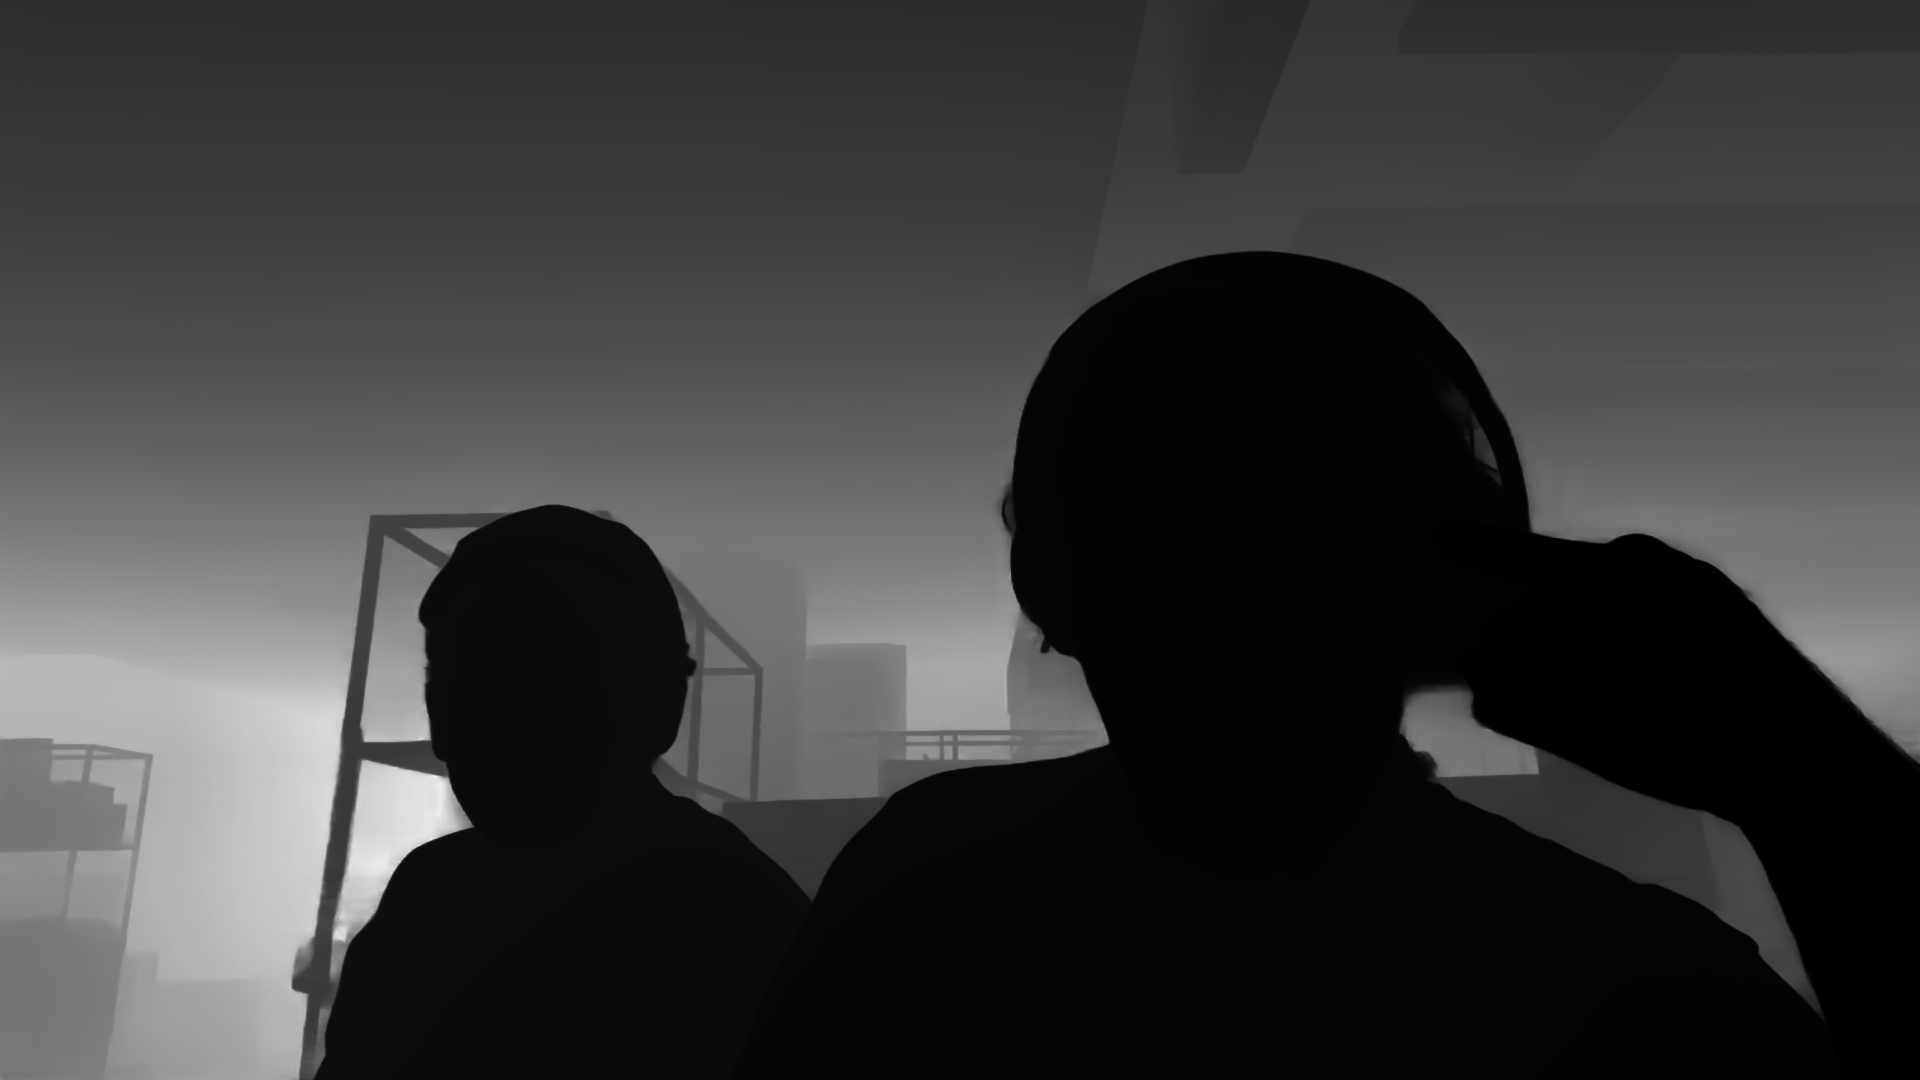

In [9]:
import numpy as np

print(depth)
depth = (depth - depth.min()) / depth.max()
print(depth)
# Remove the extra channel dimension if present.
img_array = depth.cpu().numpy()

# Convert the image from [0, 1] to [0, 255] and cast to uint8.
img_array = (img_array*255).astype(np.uint8)

# Create a PIL image in grayscale mode ('L').
pil_img = Image.fromarray(img_array, mode='L')

# Display the image using PIL's built-in viewer.
pil_img.show()

In [4]:
def calculate_l2_norms(centroids, threshold=100.0, device='cuda'):
    """
    Vectorized function to calculate pairwise L2 norms between centroids (3D) on GPU
    and return group memberships based on a distance threshold.

    Parameters:
    centroids (torch.Tensor): A tensor of shape (N, 3) representing object centroids (x, y, z) for the current frame.
    threshold (float): The distance threshold to consider objects in the same group.
    device (str): Device where the tensors are stored ('cpu' or 'cuda').

    Returns:
    group_memberships (list of sets): List of sets, each set contains indices of objects that are in the same group.
    """
    centroids = centroids.to(device)  # Move centroids tensor to the appropriate device

    # Compute pairwise L2 distances using broadcasting in PyTorch
    diff = centroids[:, None, :] - centroids[None, :, :]  # Shape (N, N, 3)
    dist_matrix = torch.norm(diff, dim=2)  # Shape (N, N), compute the L2 norm along axis 2

    # Create a list of groups based on the distance threshold
    num_objects = centroids.shape[0]
    group_memberships = []

    for i in range(num_objects):
        group = set([i])  # Start with the current object in its own group
        for j in range(num_objects):
            if i != j and dist_matrix[i, j] < threshold:
                group.add(j)
        group_memberships.append(group)

    return group_memberships

def track_groups(previous_groups, current_groups):
    """
    Function to track if objects have joined or left groups between frames.

    Parameters:
    previous_groups (list of sets): List of sets from the previous frame's group memberships.
    current_groups (list of sets): List of sets from the current frame's group memberships.

    Returns:
    joined (list): List of object indices that joined a new group.
    left (list): List of object indices that left a group.
    """
    joined = []
    left = []

    # Create sets to track which objects have changed groups
    prev_indices = {frozenset(group) for group in previous_groups}
    curr_indices = {frozenset(group) for group in current_groups}

    # Detect objects joining new groups
    for i, current_group in enumerate(current_groups):
        if frozenset(current_group) not in prev_indices:
            joined.append(i)

    # Detect objects leaving groups
    for i, prev_group in enumerate(previous_groups):
        if frozenset(prev_group) not in curr_indices:
            left.append(i)

    return joined, left


In [ ]:
results = model.track(source="Homebrew-video/Low-quality/IMG_5347.MP4",stream=True,imgsz=1280,classes=[0],vid_stride=10)
for r in results:
    #print(r.cuda())
    # Load and preprocess an image.
    #d_image, _, f_px = depth_pro.load_rgb("Homebrew-image/WIN_20250308_20_09_29_Pro.jpg")
    d_img = transform(r.orig_img).to("cuda")
    # Run inference.
    prediction = depth_model.infer(d_img)
    depth = prediction["depth"]  # Depth in [m].
    #focallength_px = prediction["focallength_px"]  # Focal length in pixels.

    print(depth.shape)

    richard = torch.empty(0,3).to("cuda")
    for i in r.boxes:
        xy = i.xyxy[0]#; print(xy); print(xy[:2],xy[2:])
        c = torch.tensor([ (xy[:2][0]+xy[2:][0])/2, (xy[2:][-1]+xy[:2][-1])/2 ], device="cuda"); print("centroids",c)
        wh = i.xywh[0]# ;print(wh)
        d = depth[int(c[1].item())][int(c[0].item())]; print("depth value at centroid (m)",d)
        #d = ((2*torch.pi*180)/(wh[2]+wh[3]*360)*1000+3); print(d)
        #id = i.id; print(i.id)
        
        blobs = torch.hstack((c,d)); print(blobs)
        richard = torch.vstack((richard,blobs))#; print("this is richard say hello:", richard)
    #dist = calculate_l2_norms(richard); print("these are the groups:", dist)

    clustering = DBSCAN(eps=100, min_samples=2).fit(richard.cpu().numpy())
    print(clustering.labels_)

    plt.scatter(richard.cpu().numpy()[:,0],richard.cpu().numpy()[:,1],c=clustering.labels_)
    plt.xlim(0,1280)
    plt.ylim(0,720)
plt.show()

In [27]:
results = model.track(source="Homebrew-video/Low-quality/IMG_5347.MP4",stream=True,classes=[0],half=False,imgsz=1280,vid_stride=1)
frame=1
for r in results:
    #print(r.cuda())
    # Load and preprocess an image.
    #d_image, _, f_px = depth_pro.load_rgb("Homebrew-image/WIN_20250308_20_09_29_Pro.jpg")
    d_img = transform(r.orig_img).to("cuda")
    # Run inference.
    prediction = depth_model.infer(d_img)
    depth = prediction["depth"]  # Depth in [m].
    #focallength_px = prediction["focallength_px"]  # Focal length in pixels.

    print(depth.shape)

    richard = torch.empty(0,3).to("cuda")
    for i in r.boxes:
        xy = i.xyxy[0]#; print(xy); print(xy[:2],xy[2:])
        c = torch.tensor([ (xy[:2][0]+xy[2:][0])/2, (xy[2:][-1]+xy[:2][-1])/2 ], device="cuda"); print("centroids",c)
        wh = i.xywh[0]# ;print(wh)
        d = depth[int(c[1].item())][int(c[0].item())]; print("depth value at centroid (m)",d)
        #d = ((2*torch.pi*180)/(wh[2]+wh[3]*360)*1000+3); print(d)
        #id = i.id; print(i.id)
        
        blobs = torch.hstack((c,d)); print(blobs)
        richard = torch.vstack((richard,blobs))#; print("this is richard say hello:", richard)
    #dist = calculate_l2_norms(richard); print("these are the groups:", dist)

    clustering = DBSCAN(eps=100, min_samples=2).fit(richard.cpu().numpy())
    labs = clustering.labels_
    print(labs)

    
    plt.imshow(r.orig_img)
    scatter = plt.scatter(richard.cpu().numpy()[:,0],richard.cpu().numpy()[:,1],c=labs,label=labs)
    plt.legend(*scatter.legend_elements(),
               title="Classes")
    #plt.xlim(0,1280)
    #plt.ylim(0,720)
    plt.tight_layout
    plt.savefig(f"runs/dots/frame_{frame}",dpi=200)
    frame += 1
    plt.clf()


video 1/1 (frame 1/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 736x1280 4 persons, 252.5ms
torch.Size([720, 1280])
centroids tensor([995.5000, 483.7500], device='cuda:0')
depth value at centroid (m) tensor(9.7689, device='cuda:0')
tensor([995.5000, 483.7500,   9.7689], device='cuda:0')
centroids tensor([935.0000, 475.5000], device='cuda:0')
depth value at centroid (m) tensor(10.3083, device='cuda:0')
tensor([935.0000, 475.5000,  10.3083], device='cuda:0')
centroids tensor([1034.0000,  470.5000], device='cuda:0')
depth value at centroid (m) tensor(9.8839, device='cuda:0')
tensor([1034.0000,  470.5000,    9.8839], device='cuda:0')
centroids tensor([910., 466.], device='cuda:0')
depth value at centroid (m) tensor(10.9370, device='cuda:0')
tensor([910.0000, 466.0000,  10.9370], device='cuda:0')
[0 0 0 0]
video 1/1 (frame 2/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 736x1280 4 persons, 49.5ms
torch.Size([720, 1280])
centroids tensor([995.0741, 482.9976]

<Figure size 640x480 with 0 Axes>

In [28]:
model.track(source="Homebrew-video/Low-quality/IMG_5347.MP4",save=True,classes=[0],half=False,imgsz=1280,vid_stride=1)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 736x1280 4 persons, 382.2ms
video 1/1 (frame 2/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 736x1280 4 persons, 51.2ms
video 1/1 (frame 3/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 736x1280 4 persons, 50.8ms
video 1/1 (frame 4/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 736x1280 4 persons, 49.9ms
video 1/1 (frame 5/368)

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [30]:
model.track(source="Homebrew-video/Low-quality/IMG_5347.MP4",save=True,classes=[0],half=False,imgsz=1280,vid_stride=1,iou=0.9,conf=0.5)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 736x1280 4 persons, 334.9ms
video 1/1 (frame 2/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 736x1280 4 persons, 51.8ms
video 1/1 (frame 3/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 736x1280 4 persons, 50.8ms
video 1/1 (frame 4/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 736x1280 4 persons, 48.1ms
video 1/1 (frame 5/368)

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p